In [1]:
import os
import pickle

with open("data/final_result.pkl", "rb") as f:
    data = pickle.load(f)

print(type(data))
print(len(data))

<class 'dict'>
2717


In [2]:
import pandas as pd

df = pd.DataFrame(list(data.items()), columns=["query", "answer"])
df.head()

,query,answer
0,[가입절차] 스마트스토어센터 회원가입은 어떻게 하나요? (ID만들기),네이버 커머스 ID 하나로 스마트스토어센터와 같은 네이버의 다양한 커머스 서비스를 ...
1,[가입서류] 스마트스토어 판매자 유형별 필요한 서류가 어떻게 되나요?,스마트스토어 판매 회원 분류는 아래와 같으며 반드시 모든 서류를 제출해 주셔야 가입...
2,[심사결과] 가입 신청을 했습니다. 심사 결과는 어떻게 확인하나요?,"스마트스토어센터에 로그인하시면 ""팝업"" 또는 [판매자 정보 > 심사내역 조회] 메뉴..."
3,[가입절차][쇼핑윈도/패션타운] 네이버 쇼핑윈도 노출 절차는 어떻게 되나요?,"네이버 쇼핑 윈도에 입점하기 위해서는, [노출관리 > 쇼핑윈도 노출제안] 을 통해 ..."
4,[가입서류] 국내 사업자로 가입하려면 어떤 서류가 필요한가요?,국내 간이/개인(일반)/법인 사업자'로 가입하기 위해서는 아래의 서류를 사전에 준비...


In [3]:
print("데이터 타입, 결측치 확인")
display(df.info())

print("수치형 통계 요약")
display(df.describe())

print("결측치 개수 확인:")
display(df.isnull().sum())

print("중복 행 확인:")
display(df.duplicated().sum())

print("유니크한 개수 확인:")
display(df.nunique())

데이터 타입, 결측치 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   query   2717 non-null   object
 1   answer  2717 non-null   object
dtypes: object(2)
memory usage: 42.6+ KB


None

수치형 통계 요약


,query,answer
count,2717,2717
unique,2717,2706
top,[가입절차] 스마트스토어센터 회원가입은 어떻게 하나요? (ID만들기),스마트스토어 대출안심케어 전용 상담센터로 문의하시면 자세히 안내 받으실 수 있습니다...
freq,1,3


결측치 개수 확인:


query     0
answer    0
dtype: int64

중복 행 확인:


np.int64(0)

유니크한 개수 확인:


query     2717
answer    2706
dtype: int64

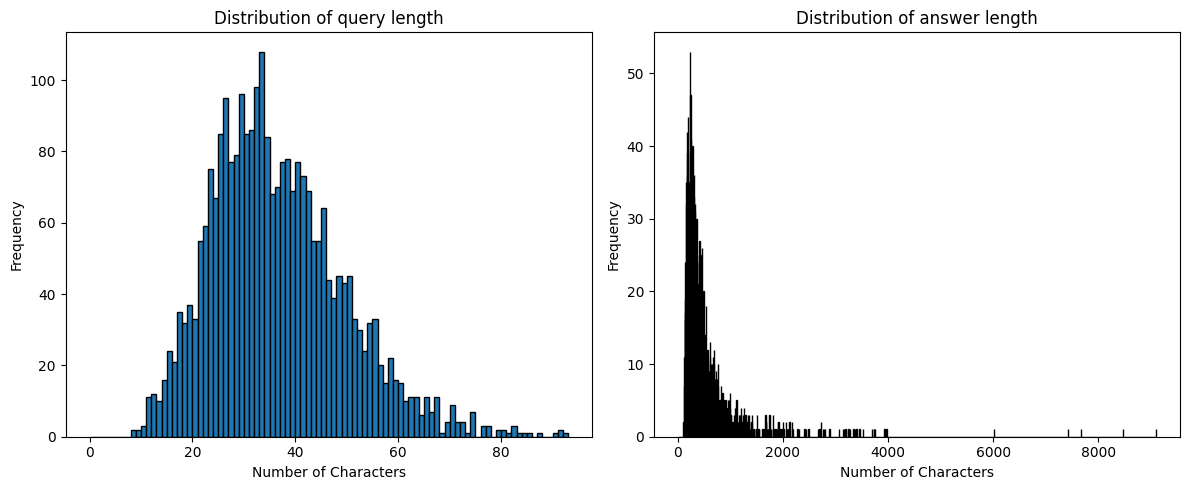

In [5]:
import matplotlib.pyplot as plt

# 시각화
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

df["query_len"] = df["query"].apply(len)
df["answer_len"] = df["answer"].apply(len)

# 제목 길이
axes[0].hist(df["query_len"], bins=range(0, max(df["query_len"]) + 2), edgecolor='black')
axes[0].set_title("Distribution of query length")
axes[0].set_xlabel("Number of Characters")
axes[0].set_ylabel("Frequency")

# 설명 길이
axes[1].hist(df["answer_len"], bins=range(0, max(df["answer_len"]) + 5, 5), edgecolor='black')
axes[1].set_title("Distribution of answer length")
axes[1].set_xlabel("Number of Characters")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [9]:
import re


def clean_query(text):
    # [text] 패턴 전체 삭제
    text = re.sub(r'\[.*?]\s*', '', text)

    # 여러 개의 공백을 하나로 줄이고 strip
    text = re.sub(r'\s+', ' ', text).strip()
    return text


def clean_answer(text):
    # 제거할 유니코드 문자
    unwanted_chars = [
        '\u00A0',  # non-breaking space (xa0 or &nbsp;)
        '\u3000',  # ideographic space (full-width space)
        '\u200b',  # zero-width space
        '\u200d',  # zero-width joiner
        '\ufeff'   # BOM
    ]

    # 유니코드 문자 제거
    for ch in unwanted_chars:
        text = text.replace(ch, ' ')

    # 여러 개의 공백을 하나로 줄이고 strip
    text = re.sub(r'\s+', ' ', text).strip()

    # 시스템 문장 제거
    text = re.sub("위 도움말이 도움이 되었나요?.*", "", text, flags=re.DOTALL)

    return text


df["cleaned_query"] = df["query"].apply(clean_query)
df["cleaned_answer"] = df["answer"].apply(clean_answer)
df.head()

,query,answer,query_len,answer_len,cleaned_query,cleaned_answer
0,[가입절차] 스마트스토어센터 회원가입은 어떻게 하나요? (ID만들기),네이버 커머스 ID 하나로 스마트스토어센터와 같은 네이버의 다양한 커머스 서비스를 ...,38,998,스마트스토어센터 회원가입은 어떻게 하나요? (ID만들기),네이버 커머스 ID 하나로 스마트스토어센터와 같은 네이버의 다양한 커머스 서비스를 ...
1,[가입서류] 스마트스토어 판매자 유형별 필요한 서류가 어떻게 되나요?,스마트스토어 판매 회원 분류는 아래와 같으며 반드시 모든 서류를 제출해 주셔야 가입...,38,3737,스마트스토어 판매자 유형별 필요한 서류가 어떻게 되나요?,스마트스토어 판매 회원 분류는 아래와 같으며 반드시 모든 서류를 제출해 주셔야 가입...
2,[심사결과] 가입 신청을 했습니다. 심사 결과는 어떻게 확인하나요?,"스마트스토어센터에 로그인하시면 ""팝업"" 또는 [판매자 정보 > 심사내역 조회] 메뉴...",37,886,가입 신청을 했습니다. 심사 결과는 어떻게 확인하나요?,"스마트스토어센터에 로그인하시면 ""팝업"" 또는 [판매자 정보 > 심사내역 조회] 메뉴..."
3,[가입절차][쇼핑윈도/패션타운] 네이버 쇼핑윈도 노출 절차는 어떻게 되나요?,"네이버 쇼핑 윈도에 입점하기 위해서는, [노출관리 > 쇼핑윈도 노출제안] 을 통해 ...",42,955,네이버 쇼핑윈도 노출 절차는 어떻게 되나요?,"네이버 쇼핑 윈도에 입점하기 위해서는, [노출관리 > 쇼핑윈도 노출제안] 을 통해 ..."
4,[가입서류] 국내 사업자로 가입하려면 어떤 서류가 필요한가요?,국내 간이/개인(일반)/법인 사업자'로 가입하기 위해서는 아래의 서류를 사전에 준비...,34,2889,국내 사업자로 가입하려면 어떤 서류가 필요한가요?,국내 간이/개인(일반)/법인 사업자'로 가입하기 위해서는 아래의 서류를 사전에 준비...
